# Conditional Flow-Matching
We learn the galaxy phase space densities from gaia data

In [2]:
from DynGenModels.trainer.trainer import DynGenModelTrainer
from DynGenModels.configs.mnist_configs import MNIST_UNet_CondFlowMatch as Config

config = Config(NAME = 'noise_to_mnist',
                DATA_SOURCE = 'noise',
                DATA_TARGET = 'mnist',
                DATA_SPLIT_FRACS = [0.8, 0.2, 0.0],
                BATCH_SIZE = 128,
                EPOCHS = 3,
                LR = 1e-4,
                DIM_HIDDEN = 32, 
                SIGMA = 0.0,
                SOLVER ='dopri5',
                ATOL = 1e-4,
                RTOL = 1e-4,
                NUM_SAMPLING_STEPS = 100)

#...set working directory for results:

config.set_workdir(path='../../results', save_config=True)

#=========================================================================================
INFO: created directory: ../../results/noise_to_mnist.CondFlowMatch.Unet.2024.02.10_18h41
#=========================================================================================
+---------------------+-----------------+
| Parameters          | Values          |
+---------------------+-----------------+
| NAME                | noise_to_mnist  |
| DATA_SOURCE         | noise           |
| DATA_TARGET         | mnist           |
| DIM_INPUT           | 784             |
| INPUT_SHAPE         | (1, 28, 28)     |
| DEVICE              | cpu             |
| OPTIMIZER           | Adam            |
| LR                  | 0.0001          |
| WEIGHT_DECAY        | 0.0             |
| OPTIMIZER_BETAS     | [0.9, 0.999]    |
| OPTIMIZER_EPS       | 1e-08           |
| OPTIMIZER_AMSGRAD   | False           |
| GRADIENT_CLIP       |                 |
| SCHEDULER           |                 |
| SCHEDULER_T_

In [3]:
from DynGenModels.datamodules.mnist.datasets import MNISTDataset 
mnist = MNISTDataset(config)

In [ ]:
from DynGenModels.dynamics.cnf.condflowmatch import CondFlowMatching
from DynGenModels.datamodules.mnist.dataloader import MNISTDataloader
from DynGenModels.models.unet import Unet

cfm = DynGenModelTrainer(dynamics = CondFlowMatching(config), 
                         model = Unet(config),
                         dataloader = MNISTDataloader(mnist, config), 
                         config = config)

cfm.train()

### generate data from trained model:

In [1]:
import torch
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 

pipeline = FlowMatchPipeline(trained_model=cfm, 
                             num_sampling_steps=100,
                             configs=config)
sample = pipeline.generate_samples(input_source=torch.randn(100, 1, 28, 28))

NameError: name 'cfm' is not defined

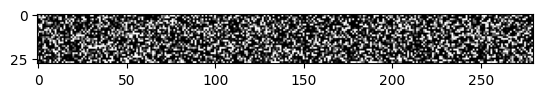

In [11]:
from torchvision import datasets, transforms
from torchvision.transforms import ToPILImage
from torchvision.utils import make_grid
from matplotlib import pyplot as plt


grid = make_grid(
    pipeline.trajectories[-1, :100].view([-1, 1, 28, 28]).clip(0, 1), value_range=(0, 1), padding=0, nrow=10
)
img = ToPILImage()(grid)
plt.imshow(img)

In [7]:
from torchvision.transforms import ToPILImage
x0 = pipeline.trajectories[50].squeeze(0)
x1 = pipeline.trajectories[99].squeeze(0)
x = torch.cat([x0, x1], dim=1) 
img = ToPILImage()(x)
img


ValueError: pic should be 2/3 dimensional. Got 4 dimensions.